# CS716: Communications in Data Science
#### Study on three-way decisions in Disaster Management
github-link: https://github.com/kapeesh-kaul/three-way-disaster-app

*`Please note that high levels of abstractions are used in this notebook to avoid cognitive overload of the reader. To understand what each module does, it is recommended to visit the github link.`*

## Week 1: Data Collection
For the first week, we will be collecting data from the following sources:
- Google Scholar
- IEEE Xplore
- ACM Digital Library
- SpringerLink
- Scopus
- ResearchGate

We have collected `95` Such papers that talk about 3-way-decisions and disaster management. The papers are stored in the `data` folder in the root directory of the repository.


Since we saved the paper links in the bookmarks tab, we used chrome's feature to export the bookmarks to an HTML file. 
We then will use `BeautifulSoup` to parse the `HTML` file and extract the required information. 
We then will store this information in a `.csv` file for further analysis.

In [1]:
from ExtractLinks import extract_links

paper_details = extract_links(file_path='data/papers_dataset.html')

In [2]:
import pandas as pd

pd.DataFrame(paper_details, columns = ['links', 'title']).to_csv('data/papers.csv', index = False)

In [3]:
papers = pd.read_csv('data/papers.csv')
print(f'Number of papers: {len(papers)}', '\n')
papers.head()

Number of papers: 95 



,links,title
0,https://pdf.sciencedirectassets.com/271647/1-s...,Assessing the effectiveness of a three-way dec...
1,https://www.nature.com/articles/s41598-023-490...,Three-way group decisions using evidence theor...
2,https://link.springer.com/article/10.1007/s104...,A three-way decision method with tolerance dom...
3,https://link.springer.com/article/10.1007/s108...,Cost-sensitive three-way email spam filtering ...
4,https://www.integrify.com/decision-table-examp...,3 Decision Table Examples and Use Cases


In the next steps, we will go through the papers to extract key points from the paper and generate insights from the data collected.
The information extracted will include the `title`, `authors`, `publication date`, and the `abstract` of the paper. 

# Week 2: In-Depth Analysis
In the second week, we will be analyzing the data collected in the previous week. We have individually read all the papers and have extracted the key points from the papers. Next, we have populated the data in a `.csv` file for further analysis. We have created additional columns like `keywords`, `contribution`, `methodology`, `results`, and `future work` to store the extracted information.

In [4]:
papers = pd.read_csv('data/Research_Papers_Table_with_All_Additional_Entries.csv')
print(f'Number of papers: {len(papers)}', '\n')
papers.head()

Number of papers: 95 



,links,title,Authors,Publication Year,Journal/Conference,Abstract Summary,3-Way Decision Methodology,3-Way Feasibility,Domains of Application,Main Objective,Evaluation Metrics,Data Type and Size,Key Findings,Future Work Suggestions,Limitations,Keywords
0,https://pdf.sciencedirectassets.com/271647/1-s...,Assessing the effectiveness of a three-way dec...,"L.D.C.S. Subhashini, Yuefeng Li, Jinglan Zhang...",2022,Information Processing and Management,This study explores a three-way opinion classi...,Integration of semantic features and fuzzy fea...,Demonstrated applicability in opinion mining a...,"Opinion mining, sentiment analysis, customer f...",To evaluate the effectiveness of a three-way d...,"Classification coverage, accuracy, sensitivity...",Amazon Musical Instrument dataset with 1400 re...,Low statistical correlation between semantic a...,Improve classification summary and adapt the m...,"Sample limited to university respondents, data...","Three-way decision model, opinion mining, fuzz..."
1,https://www.nature.com/articles/s41598-023-490...,Three-way group decisions using evidence theor...,"Chao Zhang, Juanjuan Ding, Deyu Li, Jianming Zhan",2021,International Journal of Approximate Reasoning,This study explores multi-granularity three-wa...,Multi-granularity three-way decision models wi...,Effective for group decision-making with uncer...,"Financial quality assessment, corporate decisi...",To develop a comprehensive framework using q-r...,"Sensitivity analysis, validity tests.",Not specified.,The q-ROF MAGDM approach supports flexible dec...,Explore other applications and model extensions.,Limited to group decision-making scenarios.,"q-rung orthopair fuzzy sets, multi-granularity..."
2,https://link.springer.com/article/10.1007/s104...,A three-way decision method with tolerance dom...,Yiyu Yao,2011,Information Sciences,This paper discusses probabilistic rough sets ...,Probabilistic rough set models with cost-sensi...,Cost-effective for classification tasks requir...,"Error-sensitive classification, decision suppo...",To evaluate cost-effective ternary classificat...,"Classification cost, accuracy.",Not specified.,Probabilistic three-way decisions reduce miscl...,Explore further applications in dynamic systems.,Restricted to decision costs.,"Probabilistic rough sets, three-way decisions,..."
3,https://link.springer.com/article/10.1007/s108...,Cost-sensitive three-way email spam filtering ...,"Guangming Lang, Duoqian Miao, Mingjie Cai",2017,Information Sciences,"Using decision-theoretic rough sets, this stud...",Decision-theoretic rough sets for conflict ana...,Effective for dynamic and complex conflict sce...,"Conflict resolution, dynamic information systems.",To develop efficient methods for conflict anal...,Conflict resolution effectiveness.,Simulated dynamic data sets.,Three-way models handle conflict dynamics effe...,Extend to more real-world conflict cases.,Limited experimental validation.,"Conflict analysis, three-way decisions, decisi..."
4,https://www.integrify.com/decision-table-examp...,3 Decision Table Examples and Use Cases,"Fan Jia, Peide Liu",2019,Information Sciences,This study combines three-way decisions with m...,"Three-way decision combined with MCDM, using r...",Suitable for complex decision problems with mu...,Investment decision-making.,To extend three-way decisions to MCDM environm...,Investment success metrics.,Case study on investment projects.,MCDM-based three-way decisions enhance decisio...,Apply to other multi-criteria contexts.,Focused on a single case.,"Three-way decisions, multi-criteria decision-m..."


Next, we have created a word cloud to visualize the most common keywords in the papers. 

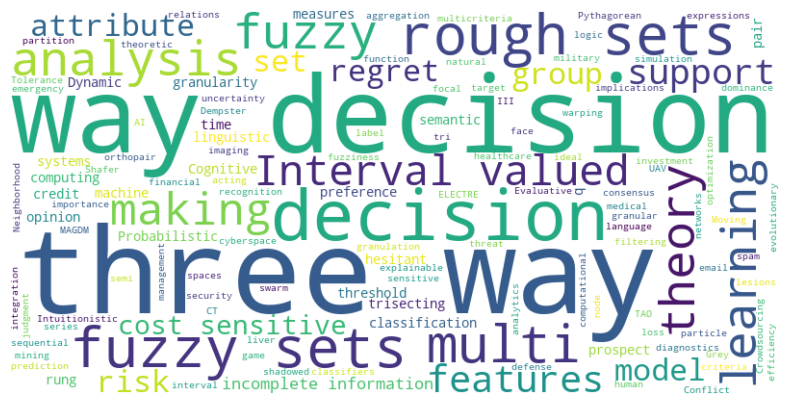

In [5]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Combine all keywords into a single string
keywords_text = ' '.join(papers['Keywords'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We have also created a bar graph to visualize the number of papers published each year.

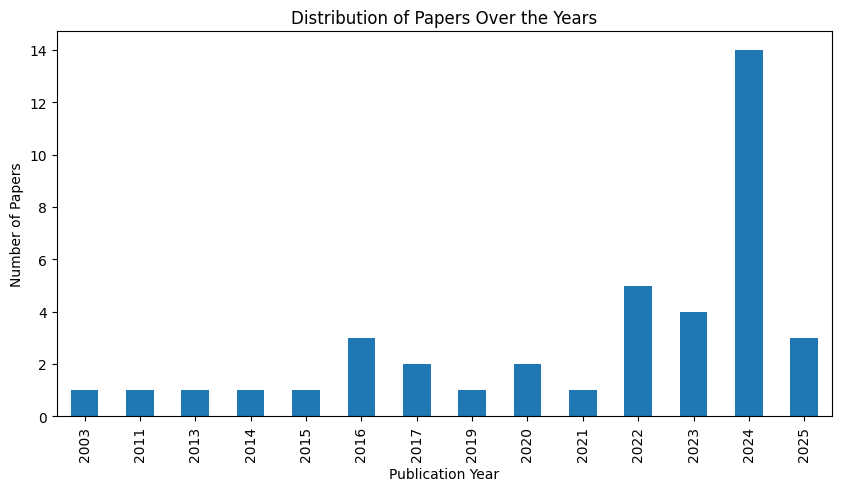

In [6]:
# Drop rows where 'Publication Year' is NaN
papers_filtered = papers.dropna(subset=['Publication Year'])

# Filter out non-numeric 'Publication Year' values
papers_filtered = papers_filtered[papers_filtered['Publication Year'].apply(lambda x: x.isnumeric())]

# Convert 'Publication Year' to integer
papers_filtered['Publication Year'] = papers_filtered['Publication Year'].astype(int)

# Plot the distribution of papers over the years
papers_filtered['Publication Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.title('Distribution of Papers Over the Years')
plt.show()

In the next steps, we will be analyzing the data to generate insights and conclusions from the data collected. Additionally, we will be generalizing the findings to understand the broader implications of the research in the field of disaster management. Finally, we will be creating a dashoard to visualize the insights generated from the data collected.

# Week 3: Generating Insights

For this week, we will be generating insights from the data collected in the previous weeks. We will be analyzing the data to understand the trends in the research on three-way decisions in disaster management. We will be looking at the most common keywords, the methodologies used, the results obtained, and the future work proposed in the papers.

We start by creating a sentiment analysis of the abstracts of the papers to understand the overall sentiment of the research. We will also be looking at the methodologies used in the papers to understand the approaches taken by the researchers.

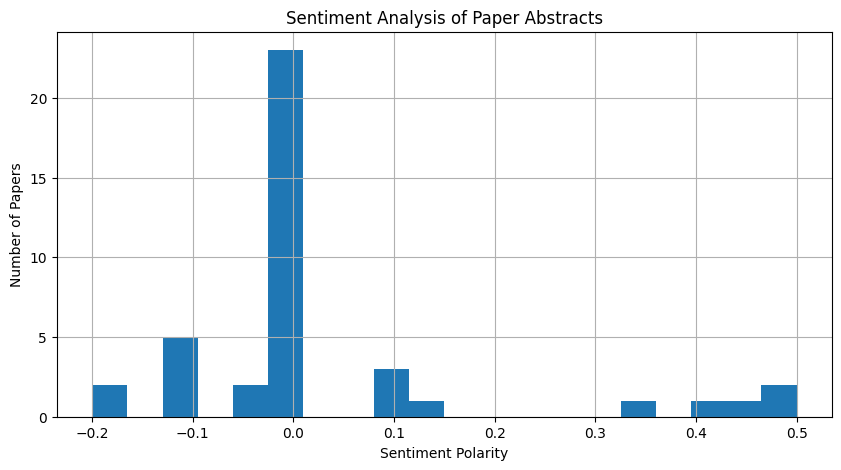

In [7]:
from textblob import TextBlob

# Function to get the sentiment of a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'Abstract' column
papers['Sentiment'] = papers['Abstract Summary'].dropna().apply(get_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(10, 5))
papers['Sentiment'].hist(bins=20)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Papers')
plt.title('Sentiment Analysis of Paper Abstracts')
plt.show()

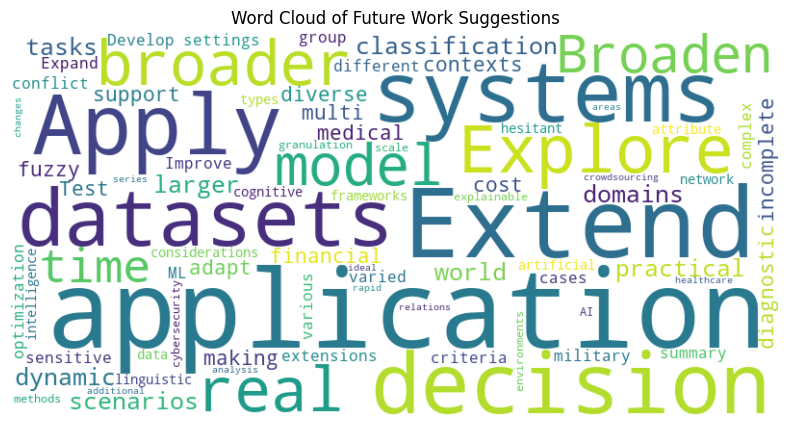

In [8]:
# Combine all future work suggestions into a single string
future_work_text = ' '.join(papers['Future Work Suggestions'].dropna())

# Generate the word cloud
future_work_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(future_work_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(future_work_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Future Work Suggestions')
plt.show()

Finally, we will be analyzing the results obtained and the future work proposed in the papers to understand the implications of the research.

# Week 4: More Insights 

In [20]:
papers.columns = papers.columns.str.strip().str.replace(' ', '_')

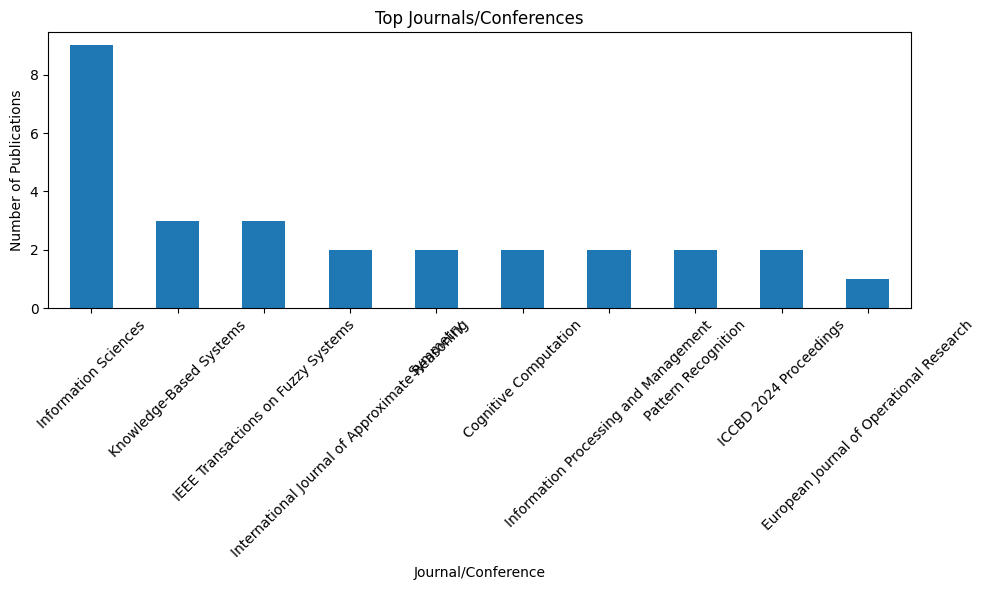

In [21]:
# Journals/Conferences Distribution
journal_distribution = papers['Journal/Conference'].value_counts().head(10)
plt.figure(figsize=(10, 6))
journal_distribution.plot(kind='bar')
plt.title('Top Journals/Conferences')
plt.xlabel('Journal/Conference')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

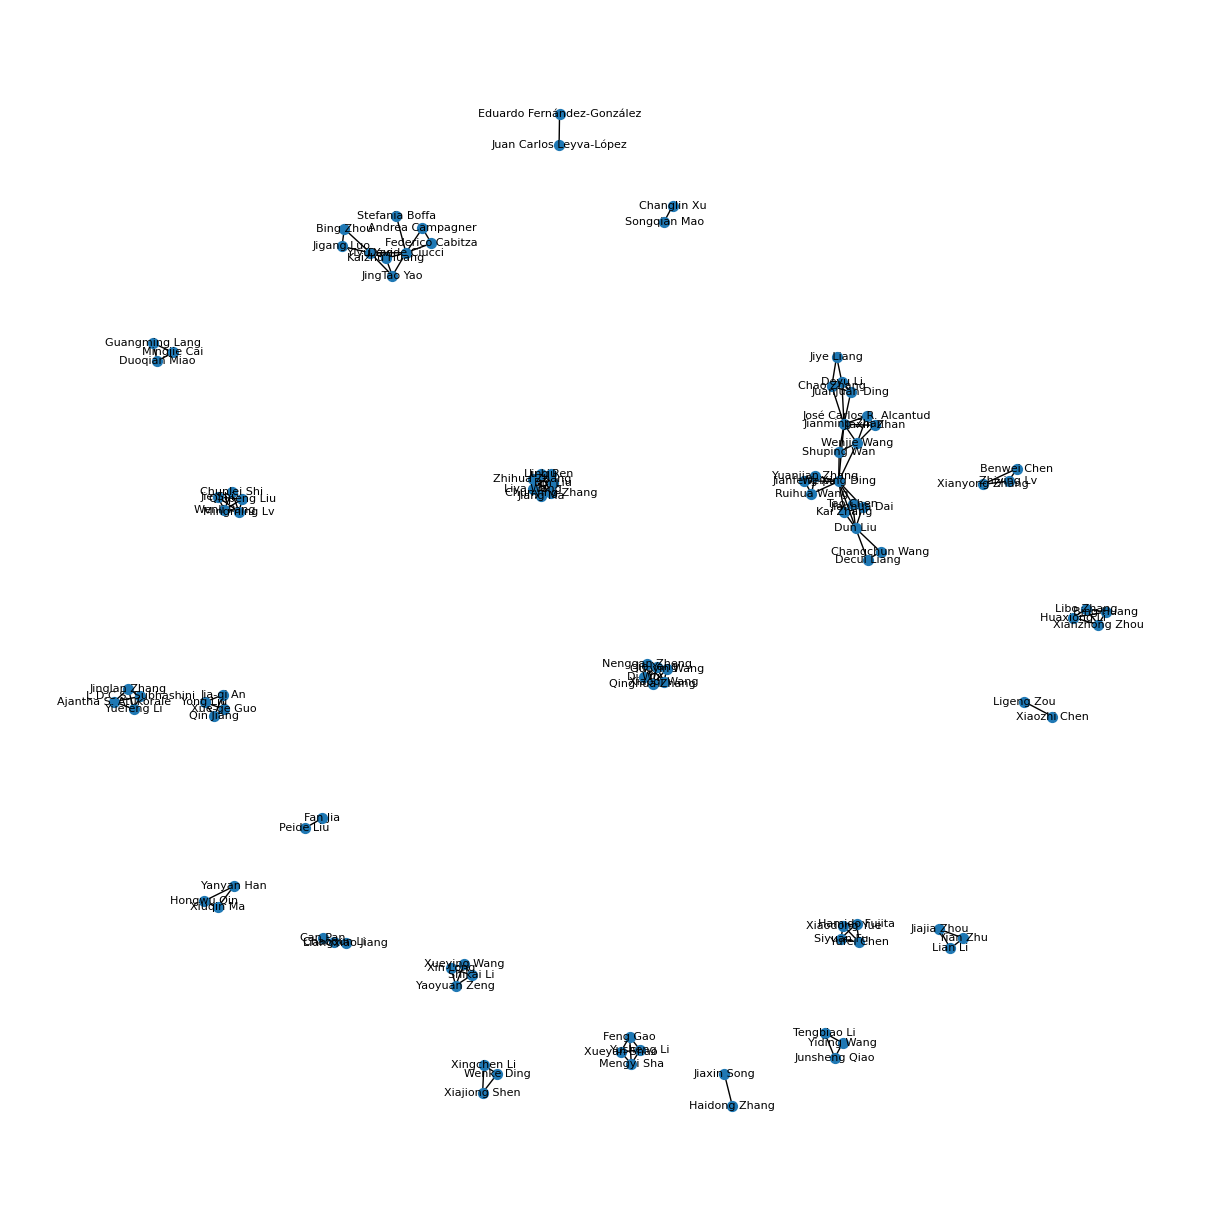

In [22]:
import networkx as nx

# Assuming research_papers_data is the same as the 'papers' DataFrame
author_data = papers['Authors'].dropna()
edges = []
for authors in author_data:
    authors_list = [a.strip() for a in authors.split(',')]
    for i in range(len(authors_list)):
        for j in range(i + 1, len(authors_list)):
            edges.append((authors_list[i], authors_list[j]))

author_graph = nx.Graph()
author_graph.add_edges_from(edges)

# Optionally, you can visualize the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(author_graph, k=0.1)  # k controls the distance between nodes
nx.draw(author_graph, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

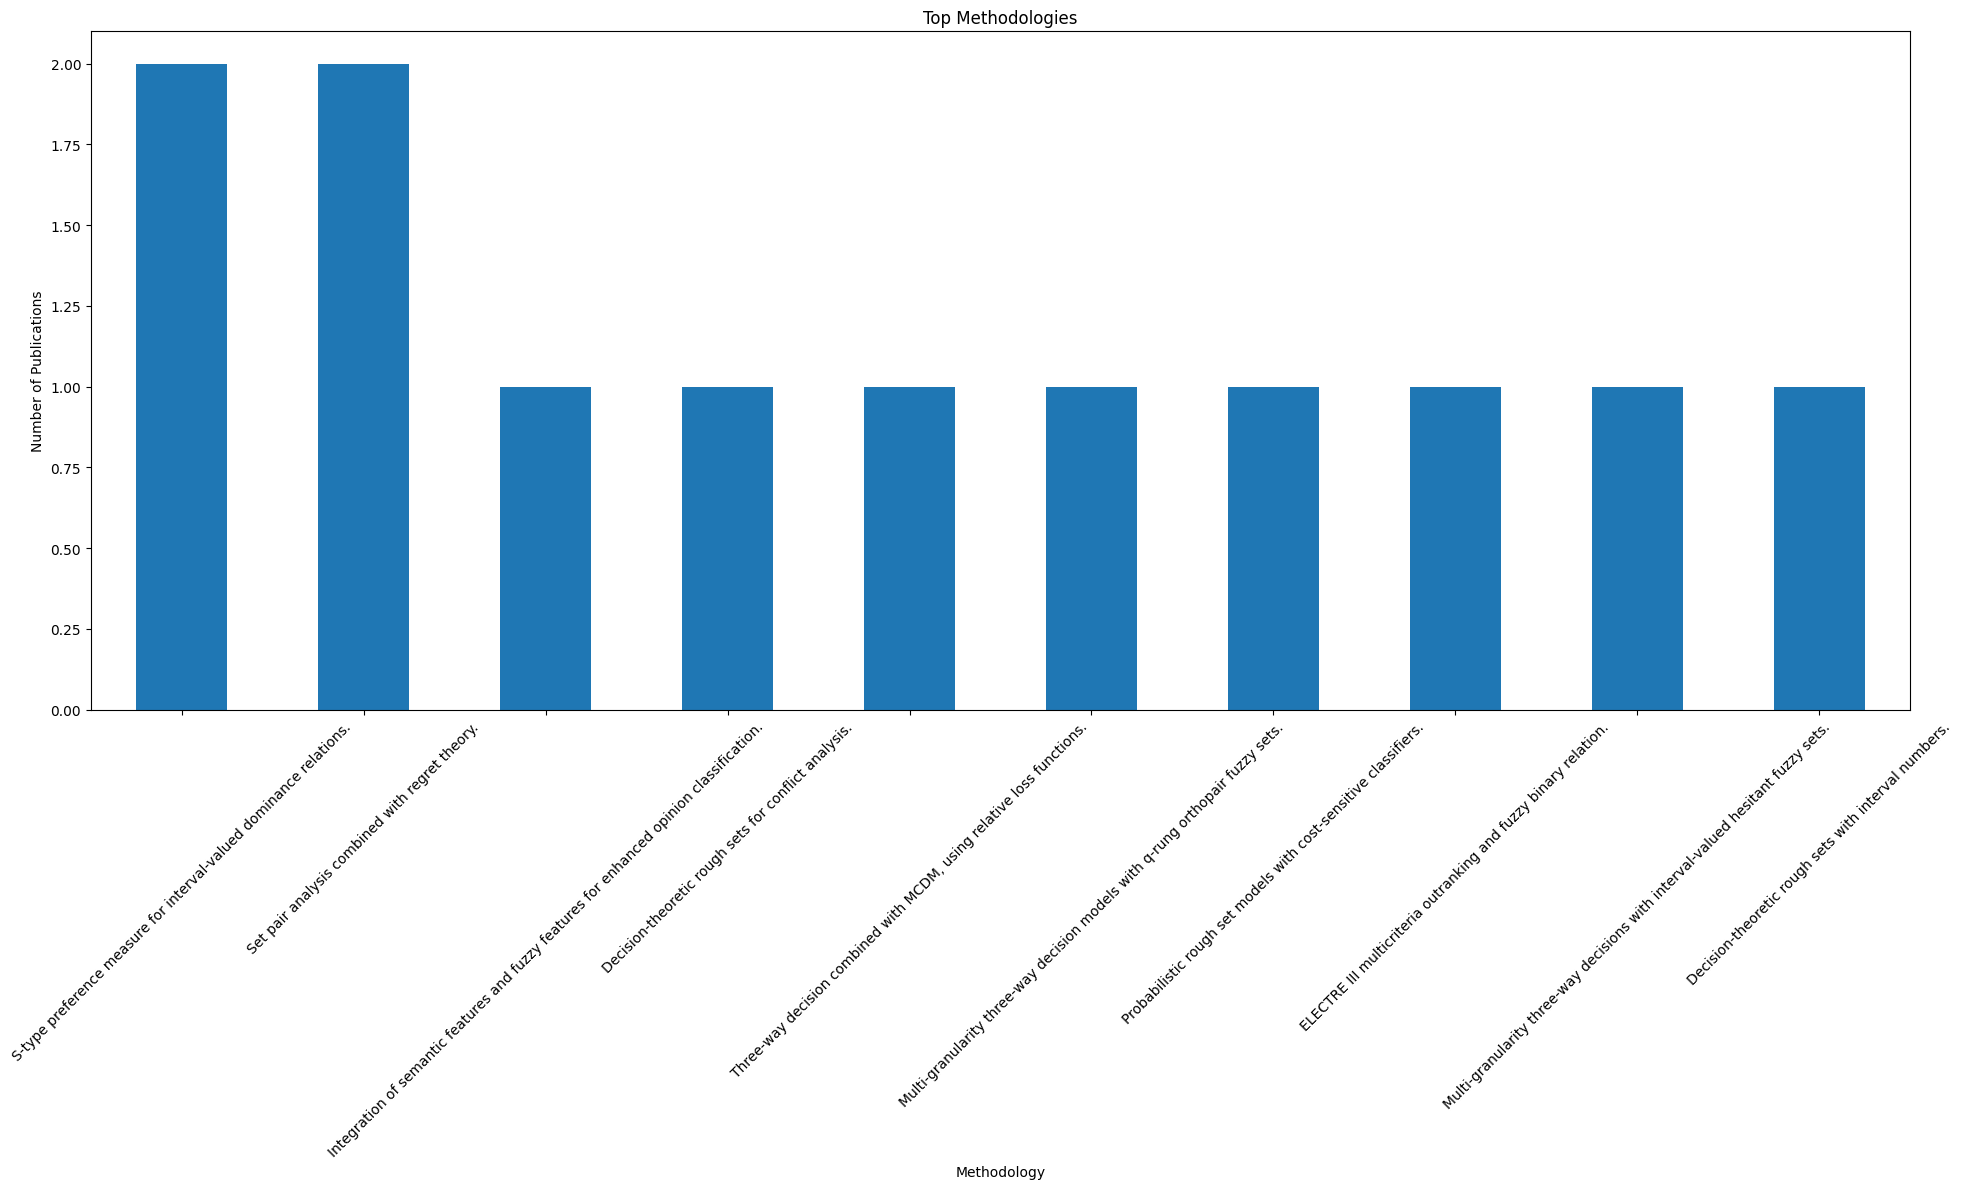

In [33]:
methodology_distribution = papers['3-Way_Decision_Methodology'].value_counts().head(10)
plt.figure(figsize=(20, 12))
methodology_distribution.plot(kind='bar')
plt.title('Top Methodologies')
plt.xlabel('Methodology')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

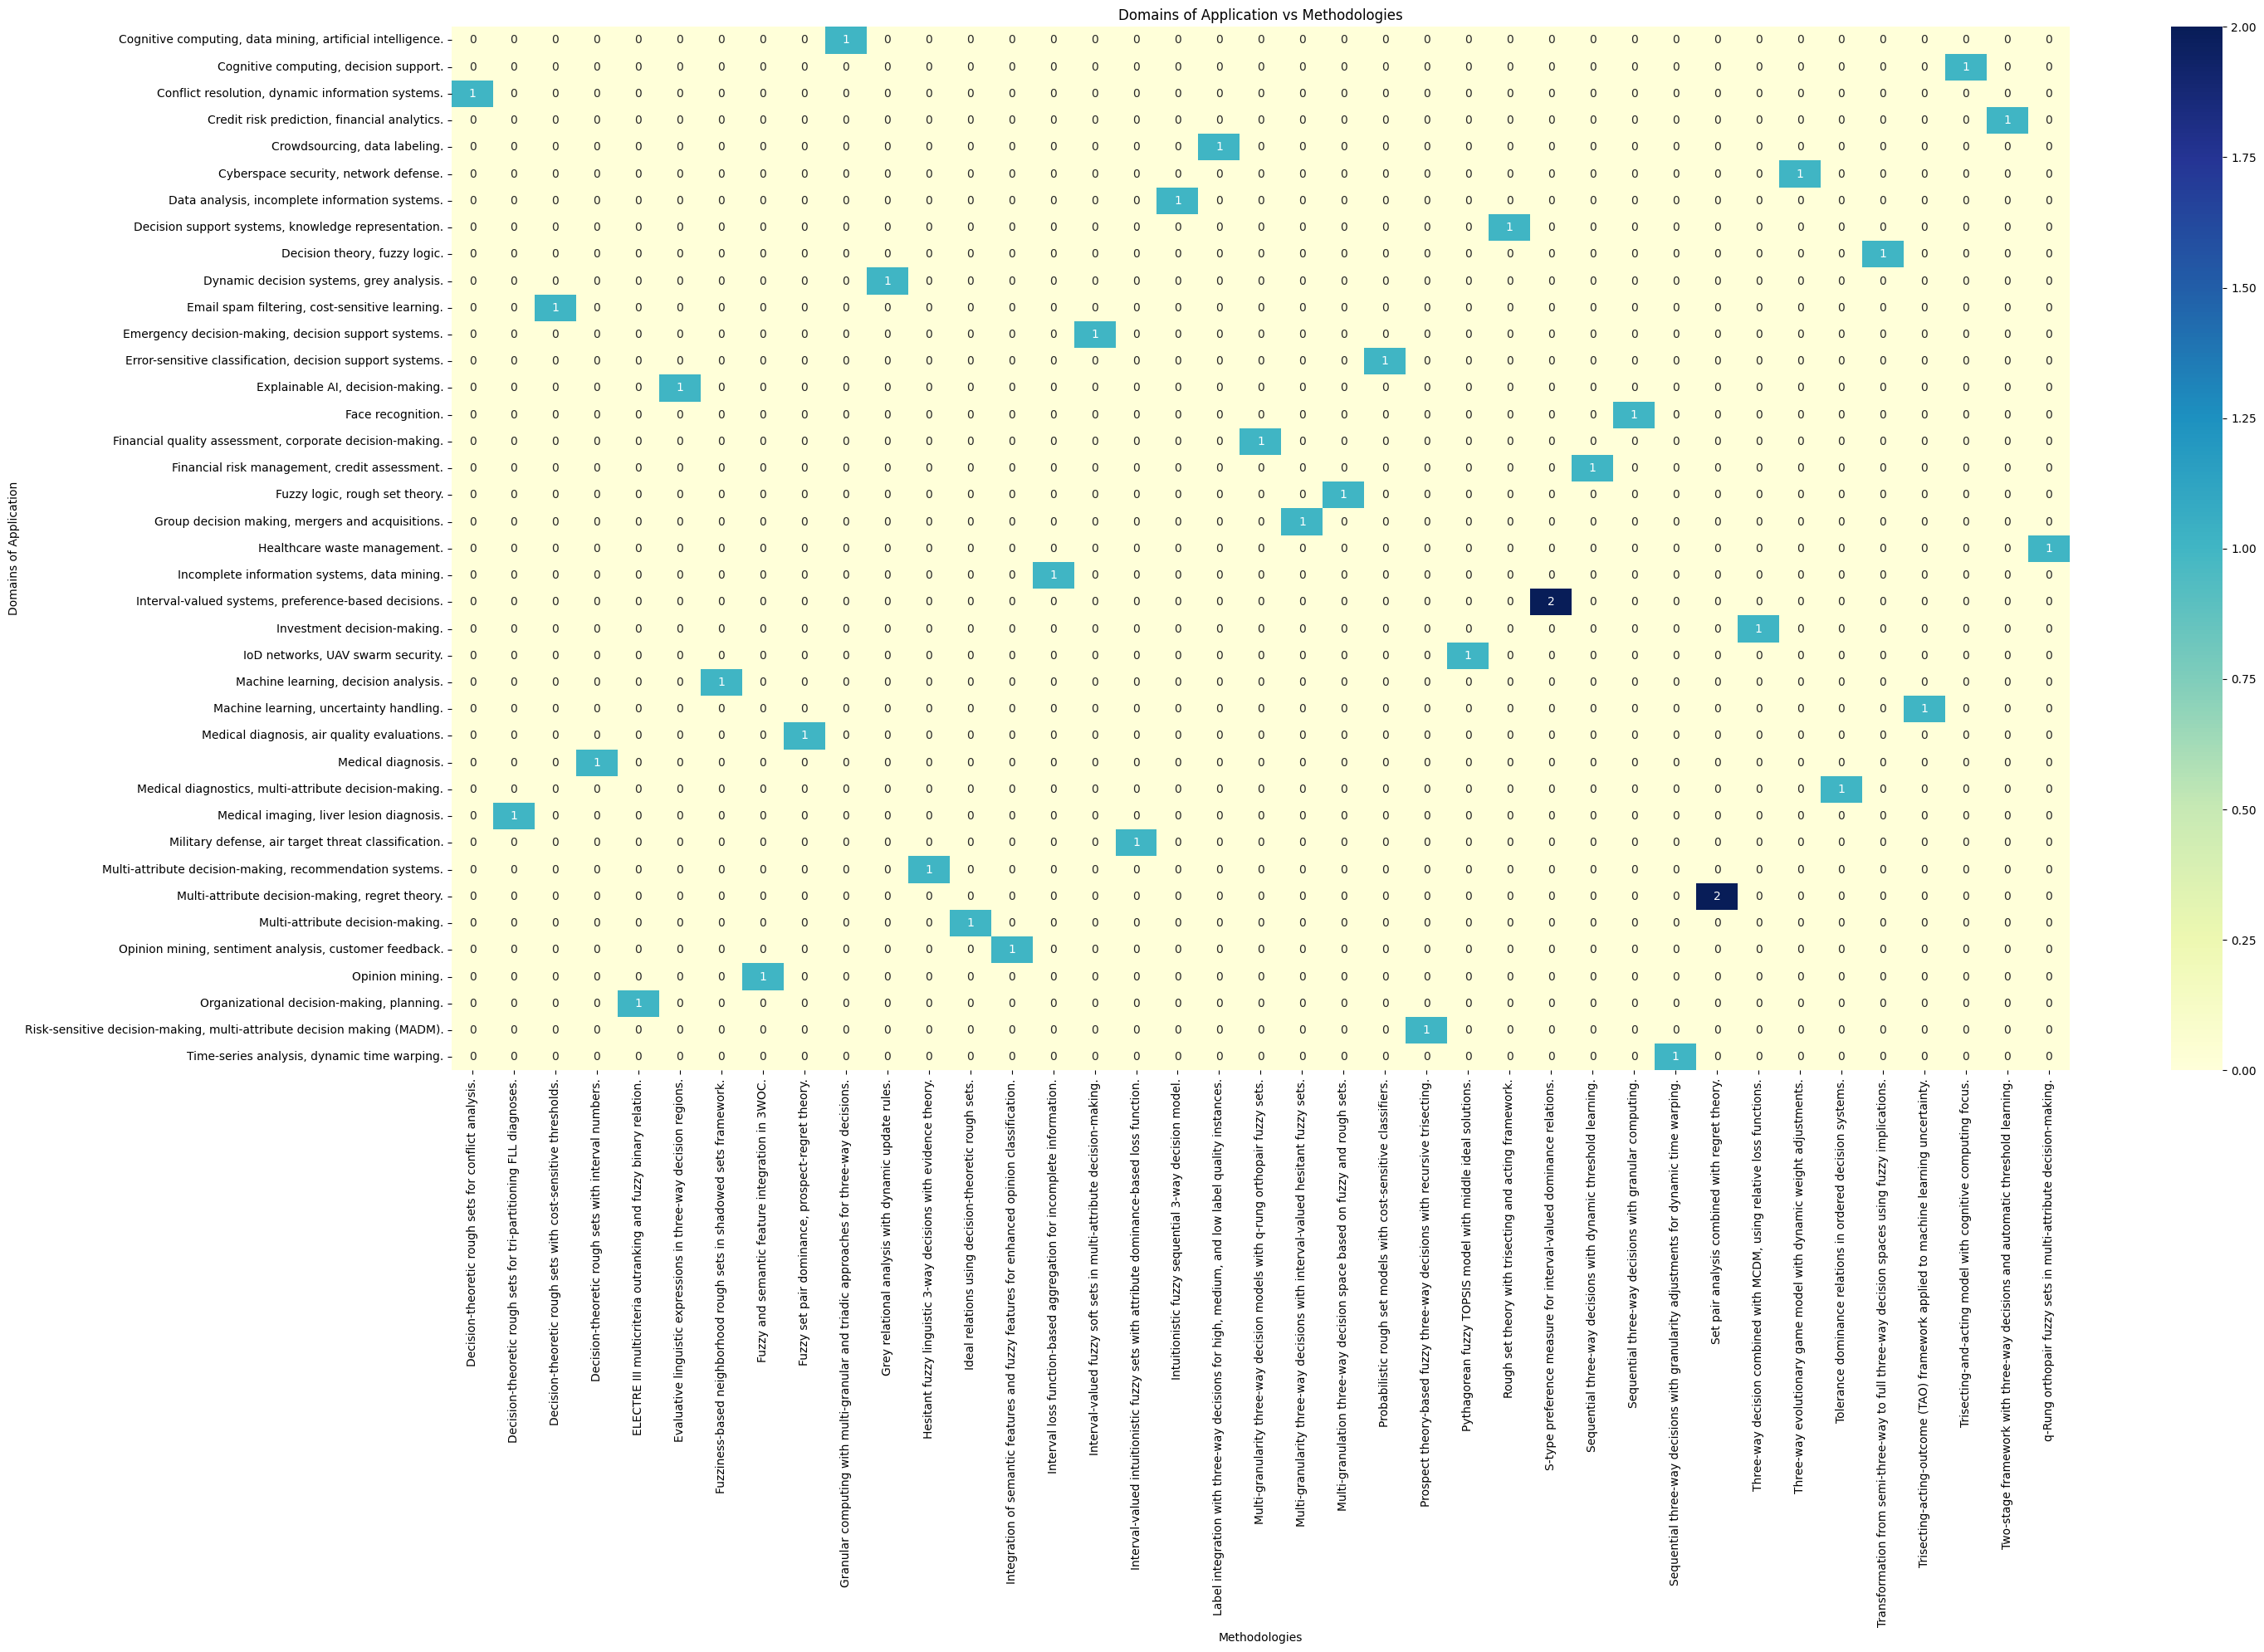

In [29]:
import seaborn as sns

domain_method_data = papers[['Domains_of_Application', '3-Way_Decision_Methodology']].dropna()
domain_method_pivot = domain_method_data.groupby(['Domains_of_Application', '3-Way_Decision_Methodology']).size().unstack(fill_value=0)

plt.figure(figsize=(30, 20))
sns.heatmap(domain_method_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Domains of Application vs Methodologies')
plt.ylabel('Domains of Application')
plt.xlabel('Methodologies')
plt.tight_layout()
plt.show()

#### Following analysis has been completed
- Publication Trends Over the Years: A bar chart shows the count of papers published annually.
- Top Journals/Conferences: A bar chart highlights the top publication venues.
- Keyword Word Cloud: A visualization of the most frequently mentioned keywords across papers.
- Author Collaboration Network: A graph represents the collaboration between authors.
- Top Methodologies: A bar chart shows the most commonly used methodologies.
- Domains vs. Methodologies Heatmap: A heatmap displays the relationships between domains of application and methodologies.

In the next steps, we will be creating a dashboard to visualize the insights generated from the data collected. We will be using `Plotly` to create interactive visualizations to understand the trends in the research on three-way decisions in disaster management.